In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('wine_data.csv',usecols=[0,1,2],names=['Class','Alcohol','Malic Acid'])
df

,Class,Alcohol,Malic Acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


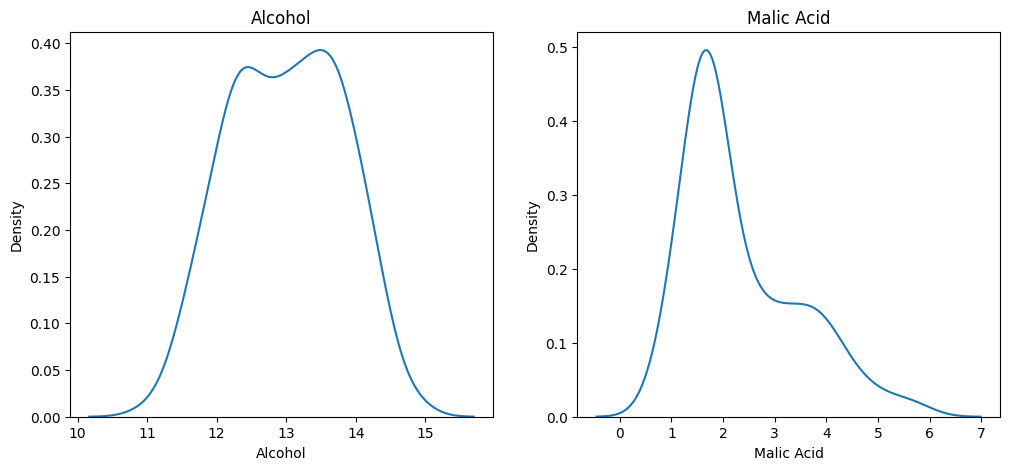

In [18]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

# Alcohol
ax1.set_title('Alcohol')
sns.kdeplot(df.Alcohol,ax = ax1)

ax2.set_title('Malic Acid')
sns.kdeplot(df['Malic Acid'],ax=ax2)

plt.show()

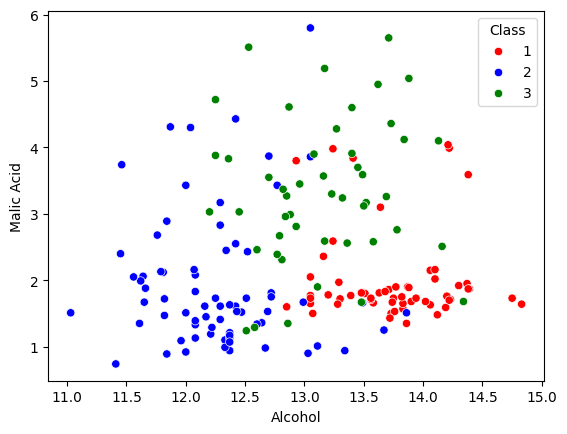

In [56]:
color_dict = {1:'red',2:'blue',3:'green'}
sns.scatterplot(x=df['Alcohol'],y=df['Malic Acid'],hue=df['Class'],palette=color_dict)

plt.show()

In [61]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_set = train_test_split(df.iloc[:,1:],
                                                df['Class'],
                                                test_size=0.3,
                                                random_state=0)

X_train.shape,X_test.shape

((124, 2), (54, 2))

In [73]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [74]:
# numpy array -> Pandas DataFrame

X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [77]:
np.round(X_train.describe(),1)

,Alcohol,Malic Acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [78]:
np.round(X_train_scaled.describe(),1)

,Alcohol,Malic Acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


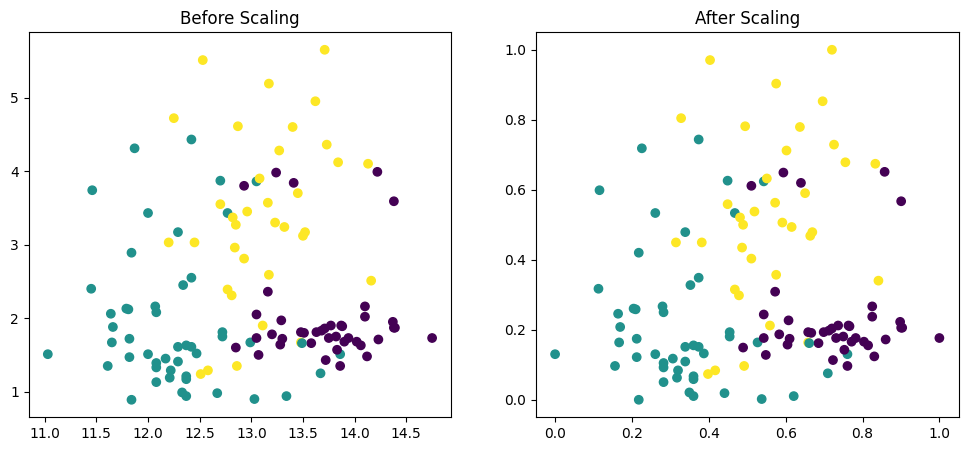

In [85]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

# before scaling
ax1.set_title('Before Scaling')
ax1.scatter(X_train['Alcohol'],X_train['Malic Acid'],c=y_train)

#after scaling
ax2.set_title('After Scaling')
ax2.scatter(X_train_scaled['Alcohol'],X_train_scaled['Malic Acid'],c=y_train)

plt.show()

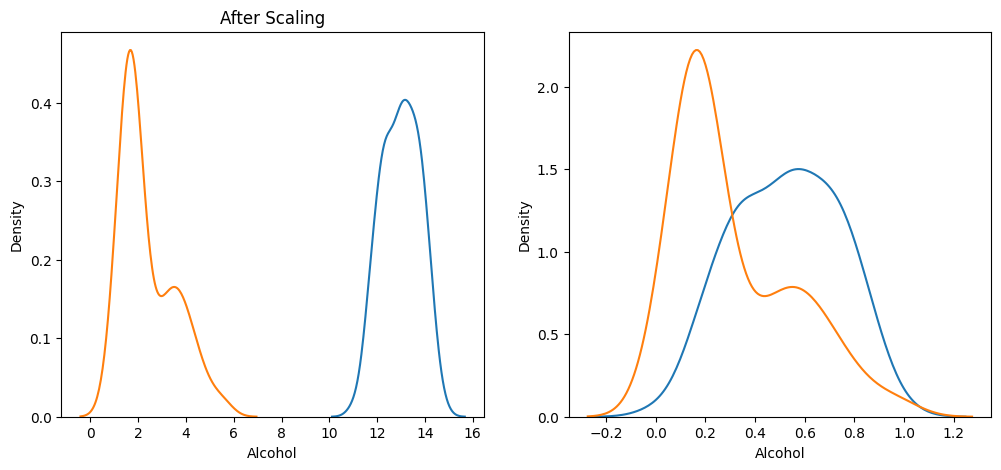

In [91]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

# before Scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'],ax=ax1)
sns.kdeplot(X_train['Malic Acid'],ax=ax1)

# After Scalingt
ax1.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Alcohol'],ax=ax2)
sns.kdeplot(X_train_scaled['Malic Acid'],ax=ax2)

plt.show()

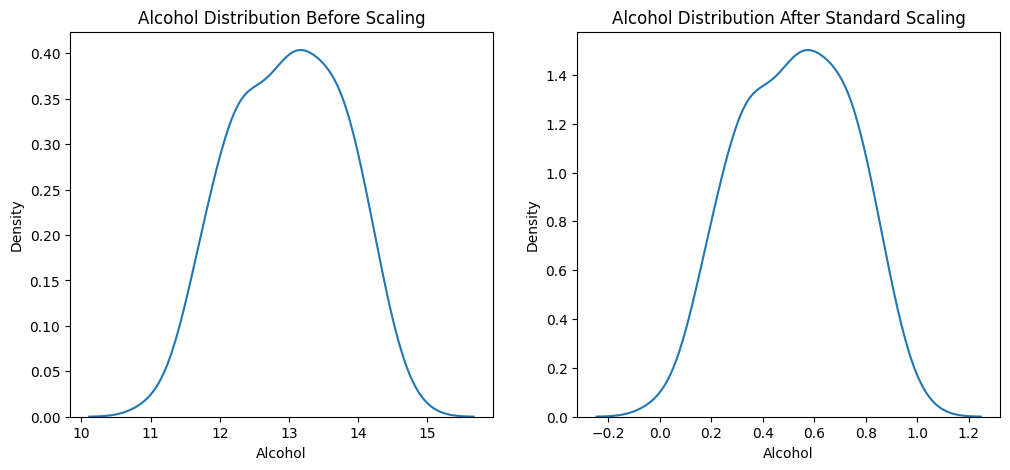

In [92]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Alcohol Distribution Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)

# after scaling
ax2.set_title('Alcohol Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
plt.show()

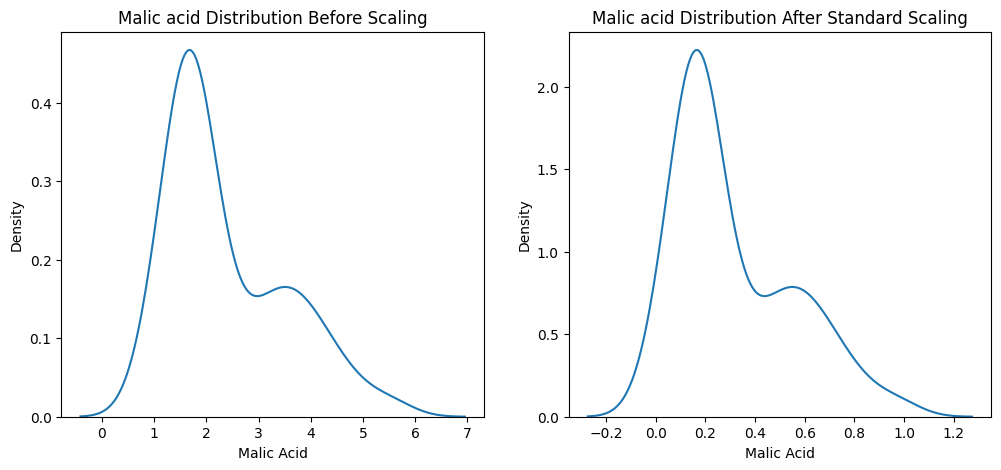

In [94]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Malic acid Distribution Before Scaling')
sns.kdeplot(X_train['Malic Acid'], ax=ax1)

# after scaling
ax2.set_title('Malic acid Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Malic Acid'], ax=ax2)
plt.show()